In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [23]:
#https://github.com/mwaskom/seaborn-data
# df=sns.load_dataset('titanic')
df=pd.read_csv('data/titanic.csv')
df
# df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [25]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [26]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [27]:
df.describe(include='object') # top means mode (most repeatative)

,sex,embarked,class,who,deck,embark_town,alive
count,891,889,891,891,203,889,891
unique,2,3,3,3,7,3,2
top,male,S,Third,man,C,Southampton,no
freq,577,644,491,537,59,644,549


In [28]:
df['sex'].nunique() # number od uiniwque

2

In [29]:
df['sex'].unique() # unique

array(['male', 'female'], dtype=object)

In [30]:
df['sex'].value_counts()

sex
male      577
female    314
Name: count, dtype: int64

In [31]:
df['embark_town'].nunique()

3

In [32]:
df['embark_town'].unique()

array(['Southampton', 'Cherbourg', 'Queenstown', nan], dtype=object)

In [33]:
df['embark_town'].value_counts()

embark_town
Southampton    644
Cherbourg      168
Queenstown      77
Name: count, dtype: int64

In [34]:
df['age'].median()

np.float64(28.0)

In [119]:
# we check class imbalance
df['survived'].value_counts()


survived
0    549
1    342
Name: count, dtype: int64

<Axes: xlabel='age', ylabel='Count'>

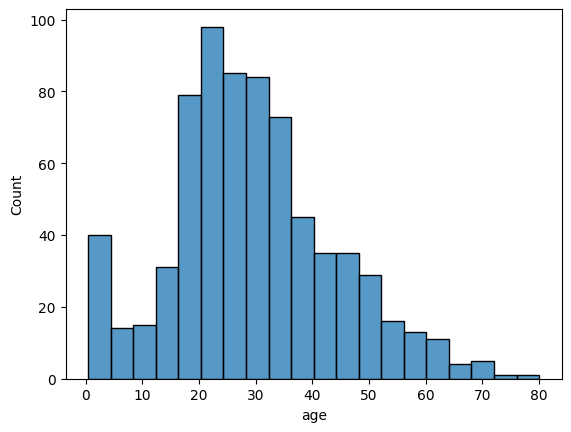

In [35]:
sns.histplot(df['age'])

In [36]:
df['age']=df['age'].fillna(df['age'].median())

In [37]:
df['sex'].mode()[0]

'male'

In [38]:
df['sex']=df['sex'].fillna(df['sex'].mode()[0])

In [39]:
df['deck'].mode()

0    C
Name: deck, dtype: object

In [40]:
df['deck']=df['deck'].fillna(df['deck'].mode()[0])

In [41]:
df['embarked']=df['embarked'].fillna(df['embarked'].mode()[0])

In [42]:
df['embark_town']=df['embark_town'].fillna(df['embark_town'].mode()[0])

In [43]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

In [44]:
# # categorical
# nominal vs ordinal
# ordinal -> with order 
# 03 types of encoding
# one hot encoding -> nominal category mayu use kerty hai
# label encoding ko hum srf output coloumn k liye use kerty hai
# ordinal encoding
df=pd.get_dummies(df,drop_first=True)
df.head()

,survived,pclass,age,sibsp,parch,fare,adult_male,alone,sex_male,embarked_Q,...,who_woman,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,embark_town_Queenstown,embark_town_Southampton,alive_yes
0,0,3,22.0,1,0,7.2500,True,False,True,False,...,False,False,True,False,False,False,False,False,True,False
1,1,1,38.0,1,0,71.2833,False,False,False,False,...,True,False,True,False,False,False,False,False,False,True
2,1,3,26.0,0,0,7.9250,False,True,False,False,...,True,False,True,False,False,False,False,False,True,True
3,1,1,35.0,1,0,53.1000,False,False,False,False,...,True,False,True,False,False,False,False,False,True,True
4,0,3,35.0,0,0,8.0500,True,True,True,False,...,False,False,True,False,False,False,False,False,True,False


In [105]:
x=df.drop(columns=['survived','age','fare'])
x

,pclass,sibsp,parch,adult_male,alone,sex_male,embarked_Q,embarked_S,class_Second,class_Third,...,who_woman,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,embark_town_Queenstown,embark_town_Southampton,alive_yes
0,3,1,0,True,False,True,False,True,False,True,...,False,False,True,False,False,False,False,False,True,False
1,1,1,0,False,False,False,False,False,False,False,...,True,False,True,False,False,False,False,False,False,True
2,3,0,0,False,True,False,False,True,False,True,...,True,False,True,False,False,False,False,False,True,True
3,1,1,0,False,False,False,False,True,False,False,...,True,False,True,False,False,False,False,False,True,True
4,3,0,0,True,True,True,False,True,False,True,...,False,False,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,0,0,True,True,True,False,True,True,False,...,False,False,True,False,False,False,False,False,True,False
887,1,0,0,False,True,False,False,True,False,False,...,True,True,False,False,False,False,False,False,True,True
888,3,1,2,False,False,False,False,True,False,True,...,True,False,True,False,False,False,False,False,True,False
889,1,0,0,True,True,True,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True


In [106]:
y=df['survived']
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: survived, Length: 891, dtype: int64

In [107]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=40)

In [108]:
X_train

,pclass,sibsp,parch,adult_male,alone,sex_male,embarked_Q,embarked_S,class_Second,class_Third,...,who_woman,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,embark_town_Queenstown,embark_town_Southampton,alive_yes
661,3,0,0,True,True,True,False,False,False,True,...,False,False,True,False,False,False,False,False,False,False
393,1,1,0,False,False,False,False,False,False,False,...,True,False,False,True,False,False,False,False,False,True
266,3,4,1,True,False,True,False,True,False,True,...,False,False,True,False,False,False,False,False,True,False
144,2,0,0,True,True,True,False,True,True,False,...,False,False,True,False,False,False,False,False,True,False
446,2,0,1,False,False,False,False,True,True,False,...,False,False,True,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440,2,1,1,False,False,False,False,True,True,False,...,True,False,True,False,False,False,False,False,True,True
165,3,0,2,False,False,True,False,True,False,True,...,False,False,True,False,False,False,False,False,True,True
7,3,3,1,False,False,True,False,True,False,True,...,False,False,True,False,False,False,False,False,True,False
219,2,0,0,True,True,True,False,True,True,False,...,False,False,True,False,False,False,False,False,True,False


In [118]:
X_test.columns

Index(['pclass', 'sibsp', 'parch', 'adult_male', 'alone', 'sex_male',
       'embarked_Q', 'embarked_S', 'class_Second', 'class_Third', 'who_man',
       'who_woman', 'deck_B', 'deck_C', 'deck_D', 'deck_E', 'deck_F', 'deck_G',
       'embark_town_Queenstown', 'embark_town_Southampton', 'alive_yes'],
      dtype='object')

In [109]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [110]:
model.fit(X_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [111]:
# y_pred=model.predict(X_test)
y_pred=model.predict([[1, 0, 3, True, False, True,
       'embarked_Q', 'embarked_S', 'class_Second', 'class_Third', 'who_man',
       'who_woman', 'deck_B', 'deck_C', 'deck_D', 'deck_E', 'deck_F', 'deck_G',
       'embark_town_Queenstown', 'embark_town_Southampton', 'alive_yes']])
y_pred

array([0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1])

In [112]:
pd.DataFrame({'y_test':y_test,'y_predict':y_pred})

,y_test,y_predict
246,0,0
588,0,0
472,1,1
71,0,0
654,0,0
...,...,...
284,0,0
727,1,1
599,1,1
525,0,0


In [113]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score,classification_report

In [114]:
accuracy_score(y_test,y_pred)

1.0

In [115]:
print('confusion matrix',confusion_matrix(y_test,y_pred))

confusion matrix [[103   0]
 [  0  76]]


In [116]:
print('precision matrix',precision_score(y_test,y_pred))
# jub precision and accuracy or f1 score 1.0 aye tou sahi hai

precision matrix 1.0


In [117]:
print('classification report \n',classification_report(y_test,y_pred))

classification report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       103
           1       1.00      1.00      1.00        76

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179

